In [ ]:
!pip install gensim
!pip install tensorflow

In [ ]:
import numpy as np
import pandas as pd
import spacy
import re
import string
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
import gensim.downloader as api
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from scipy import sparse
import keras

In [ ]:
train_df = pd.read_csv(r"/content/combined_toxic_comments.csv")

<ipython-input-3-4a5e5dc20330>:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  train_df = pd.read_csv(r"/content/combined_toxic_comments.csv")


In [ ]:
train_df.head(25)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,source
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0.0,0.0,0.0,0.0,0.0,0.0,original
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0.0,0.0,0.0,0.0,0.0,0.0,original
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0.0,0.0,0.0,0.0,0.0,0.0,original
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0.0,0.0,0.0,0.0,0.0,0.0,original
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0.0,0.0,0.0,0.0,0.0,0.0,original
5,00025465d4725e87,"""\n\nCongratulations from me as well, use the ...",0.0,0.0,0.0,0.0,0.0,0.0,original
6,0002bcb3da6cb337,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1.0,1.0,1.0,0.0,1.0,0.0,original
7,00031b1e95af7921,Your vandalism to the Matt Shirvington article...,0.0,0.0,0.0,0.0,0.0,0.0,original
8,00037261f536c51d,Sorry if the word 'nonsense' was offensive to ...,0.0,0.0,0.0,0.0,0.0,0.0,original
9,00040093b2687caa,alignment on this subject and which are contra...,0.0,0.0,0.0,0.0,0.0,0.0,original


In [ ]:
filter_ = ~train_df['source'].isin(['cleaned'])
filter_cleaned = train_df['source'].isin(['cleaned'])
df_filtered = train_df[filter_]
df_cleaned = train_df[filter_cleaned]
print(df_filtered)

                      id                                       comment_text  \
0       0000997932d777bf  Explanation\nWhy the edits made under my usern...   
1       000103f0d9cfb60f  D'aww! He matches this background colour I'm s...   
2       000113f07ec002fd  Hey man, I'm really not trying to edit war. It...   
3       0001b41b1c6bb37e  "\nMore\nI can't make any real suggestions on ...   
4       0001d958c54c6e35  You, sir, are my hero. Any chance you remember...   
...                  ...                                                ...   
159567  ffea4adeee384e90  You should be ashamed of yourself \n\nThat is ...   
159568  ffee36eab5c267c9  Spitzer \n\nUmm, theres no actual article for ...   
159569  fff125370e4aaaf3  And it looks like it was actually you who put ...   
159570  fff46fc426af1f9a  "\nAnd ... I really don't think you understand...   
339024            461010  larry this grant was specifically for this it ...   

        toxic  severe_toxic  obscene  threat  insul

In [ ]:
df_filtered.to_csv('original_comments.csv', index=False)

In [ ]:
!python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 37.7 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
# Load spaCy model (make sure to run: python -m spacy download en_core_web_sm)
nlp = spacy.load("en_core_web_sm", disable=["parser", "ner", "textcat"])

def vectorized_clean(series):
    """
    Use vectorized operations to lowercase and remove punctuation.
    """
    pattern = f"[{re.escape(string.punctuation)}]"
    return series.str.lower().str.replace(pattern, '', regex=True)

def spacy_tokenize(texts, batch_size=500):
    """
    Use spaCy's nlp.pipe to tokenize text in batches.
    """
    clean_texts = []
    for doc in tqdm(nlp.pipe(texts, batch_size=batch_size, n_process=1), total=len(texts)):
        tokens = [token.text for token in doc if not token.is_space]
        clean_texts.append(" ".join(tokens))
    return clean_texts

In [ ]:
chunk_size = 10**6  # Adjust based on your memory capacity
processed_chunks = []

for chunk in pd.read_csv('/content/combined_toxic_comments.csv', chunksize=chunk_size):
    # Remove duplicates and fill missing values
    chunk.drop_duplicates(inplace=True)
    chunk.fillna('', inplace=True)

    if 'comment_text' in chunk.columns:
        # Vectorized cleaning: lowercase & remove punctuation
        chunk['comment_text'] = vectorized_clean(chunk['comment_text'])

        # Option 1: If tokenization isn't strictly needed here, comment out the next block.
        # Option 2: If tokenization is needed, use spaCy's nlp.pipe for improved performance.
        texts = chunk['comment_text'].tolist()
        chunk['comment_text'] = spacy_tokenize(texts, batch_size=500)

    processed_chunks.append(chunk)

# Concatenate all processed chunks and save the cleaned data
cleaned_original_df = pd.concat(processed_chunks)

<ipython-input-9-de79188fcc86>:4: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv('/content/combined_toxic_comments.csv', chunksize=chunk_size):
<ipython-input-9-de79188fcc86>:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  chunk.fillna('', inplace=True)
100%|██████████| 940649/940649 [1:03:53<00:00, 245.40it/s]


In [ ]:
cleaned_original_df = df_filtered.copy()

In [ ]:
# Combine the two DataFrames
combined_df = pd.concat([cleaned_original_df, df_cleaned], ignore_index=True)

In [ ]:
combined_df.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,source
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0.0,0.0,0.0,0.0,0.0,0.0,original
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0.0,0.0,0.0,0.0,0.0,0.0,original
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0.0,0.0,0.0,0.0,0.0,0.0,original
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0.0,0.0,0.0,0.0,0.0,0.0,original
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0.0,0.0,0.0,0.0,0.0,0.0,original


In [ ]:
# Check for missing values, data types, and unique values
print(combined_df.isnull().sum())
print(combined_df.dtypes)
print(combined_df.nunique())

id                0
comment_text     19
toxic             1
severe_toxic      1
obscene           1
threat            1
insult            1
identity_hate     1
source            1
dtype: int64
id                object
comment_text      object
toxic            float64
severe_toxic     float64
obscene          float64
threat           float64
insult           float64
identity_hate    float64
source            object
dtype: object
id               339025
comment_text     335677
toxic              1343
severe_toxic        402
obscene            1011
threat              640
insult             1502
identity_hate       758
source                2
dtype: int64


In [ ]:
# Fill missing values
combined_df["comment_text"] = combined_df["comment_text"].fillna("")

# Word count, character count, average word length
combined_df["word_count"] = combined_df["comment_text"].apply(lambda x: len(str(x).split()))
combined_df["char_count"] = combined_df["comment_text"].apply(lambda x: len(str(x)))
combined_df["avg_word_length"] = combined_df["char_count"] / combined_df["word_count"].replace(0, 1)

# Count punctuation marks
combined_df["punctuation_count"] = combined_df["comment_text"].apply(
    lambda x: sum(1 for char in str(x) if char in string.punctuation)
)

# Count uppercase words
combined_df["uppercase_word_count"] = combined_df["comment_text"].apply(
    lambda x: sum(1 for word in str(x).split() if word.isupper())
)

# Count titlecase words
combined_df["titlecase_word_count"] = combined_df["comment_text"].apply(
    lambda x: sum(1 for word in str(x).split() if word.istitle())
)

# Calculate % of unique words
combined_df["unique_word_count"] = combined_df["comment_text"].apply(lambda x: len(set(str(x).split())))
combined_df["word_unique_percent"] = combined_df["unique_word_count"] * 100 / combined_df["word_count"].replace(0, 1)

# Calculate % of punctuation characters
combined_df["punct_percent"] = combined_df["punctuation_count"] * 100 / combined_df["word_count"].replace(0, 1)

In [ ]:
print(combined_df.head())

                 id                                       comment_text  toxic  \
0  0000997932d777bf  Explanation\nWhy the edits made under my usern...    0.0   
1  000103f0d9cfb60f  D'aww! He matches this background colour I'm s...    0.0   
2  000113f07ec002fd  Hey man, I'm really not trying to edit war. It...    0.0   
3  0001b41b1c6bb37e  "\nMore\nI can't make any real suggestions on ...    0.0   
4  0001d958c54c6e35  You, sir, are my hero. Any chance you remember...    0.0   

   severe_toxic  obscene  threat  insult  identity_hate    source  word_count  \
0           0.0      0.0     0.0     0.0            0.0  original          43   
1           0.0      0.0     0.0     0.0            0.0  original          17   
2           0.0      0.0     0.0     0.0            0.0  original          42   
3           0.0      0.0     0.0     0.0            0.0  original         113   
4           0.0      0.0     0.0     0.0            0.0  original          13   

   char_count  avg_word_le

<ipython-input-16-80a841910237>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=label_sums.index, y=label_sums.values, palette="viridis")


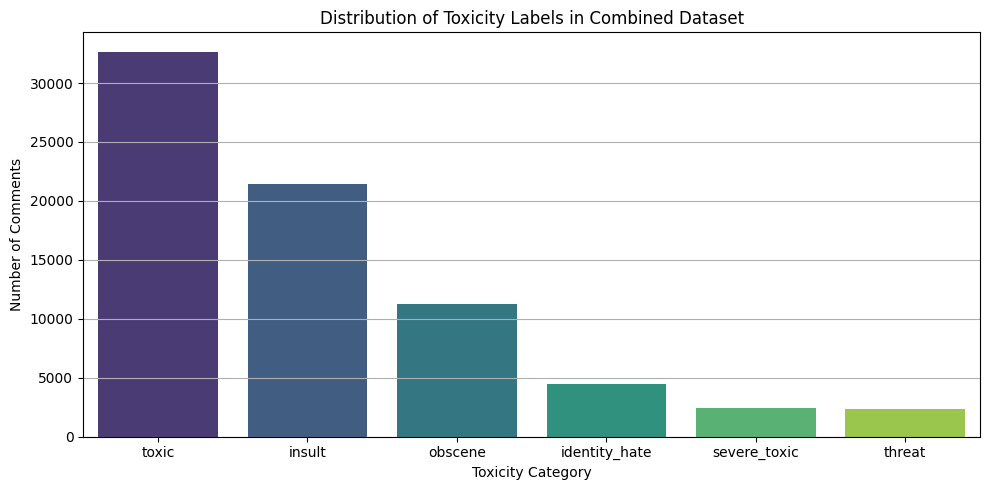

In [ ]:
# Calculate label sums
# First, convert label columns to numeric type
label_cols = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']

# Convert columns to numeric, replacing any non-numeric values with NaN
for col in label_cols:
    combined_df[col] = pd.to_numeric(combined_df[col], errors='coerce')

# Now calculate the sums
label_sums = combined_df[label_cols].sum().sort_values(ascending=False)

# Plot
plt.figure(figsize=(10, 5))
sns.barplot(x=label_sums.index, y=label_sums.values, palette="viridis")
plt.title("Distribution of Toxicity Labels in Combined Dataset")
plt.ylabel("Number of Comments")
plt.xlabel("Toxicity Category")
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [ ]:
print(combined_df[label_cols].dtypes)

toxic            float64
severe_toxic     float64
obscene          float64
threat           float64
insult           float64
identity_hate    float64
dtype: object


### Insights:

*   "Toxic", "Insult" and "identity_hate" appear most frequently — common in both datasets.

*   "obscene", "Threat", and "Severe Toxic" are rarer — showing class imbalance.



<ipython-input-18-3abbfecad325>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='num_labels', data=binary_combined_labels_df, palette="magma")


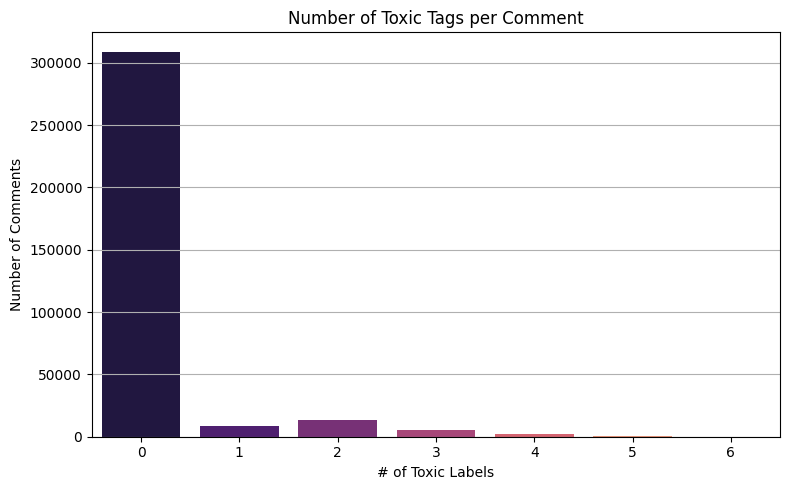

In [ ]:
binary_combined_labels_df = pd.DataFrame()

# Convert float labels to binary (threshold = 0.5)
binary_combined_labels_df[label_cols] = (combined_df[label_cols] >= 0.5).astype(int)

# Count number of labels per row
binary_combined_labels_df['num_labels'] = binary_combined_labels_df[label_cols].sum(axis=1)

# Plot distribution of number of toxic tags per comment
plt.figure(figsize=(8, 5))
sns.countplot(x='num_labels', data=binary_combined_labels_df, palette="magma")
plt.title("Number of Toxic Tags per Comment")
plt.xlabel("# of Toxic Labels")
plt.ylabel("Number of Comments")
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# Tags	Interpretation
*   0 :	Majority (~90%) of comments are clean (not labeled with any toxic tag).
*   1-2 :	A decent number have 1–2 toxic traits — e.g., just "toxic", or "toxic + insult".
*   3+ :	Fewer comments have multiple layers of toxicity (e.g., "toxic + obscene + threat").

**What This Means for Your Modeling:**

*   Imbalanced dataset: Heavy skew towards non-toxic (0-label) comments.
*   Multi-label learning is required, not just binary classification.

**Performance metrics should include:**

*   Macro F1 (accounts for minority classes)
*   Subgroup analysis (e.g., 2+ labels vs 0–1)

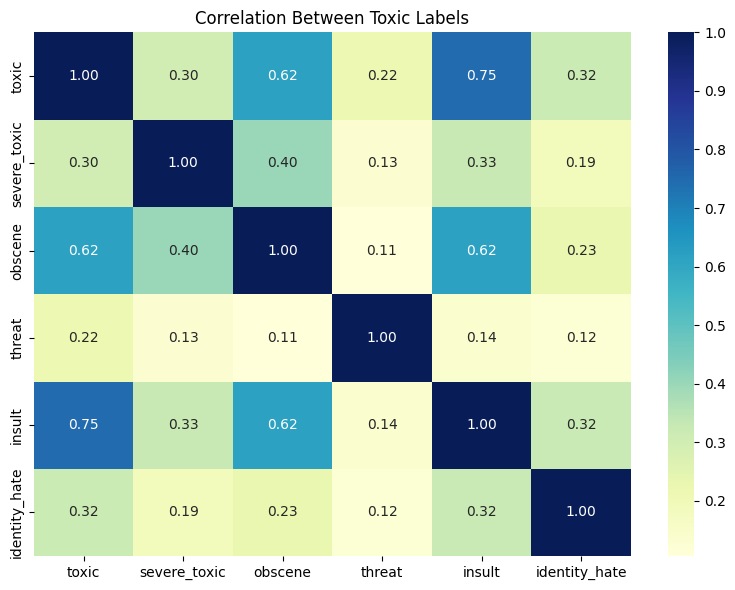

In [ ]:
# Calculate Pearson correlation between label columns
correlation = combined_df[label_cols].corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap="YlGnBu", fmt=".2f")
plt.title("Correlation Between Toxic Labels")
plt.tight_layout()
plt.show()

### Strong Correlations

*   Toxic ↔ Insult: 0.89
Indicates that most "insult" comments are also labeled "toxic". A model learning to predict "toxic" might already capture a lot of "insult" signal.
*   Toxic ↔ Obscene: 0.51
Often used together — offensive language usually overlaps with toxicity.
*   Toxic ↔ Severe Toxic: 0.32
Every "severe toxic" comment is by definition "toxic", which this reflects.

In [ ]:
print(binary_combined_labels_df.head())

   toxic  severe_toxic  obscene  threat  insult  identity_hate  num_labels
0      0             0        0       0       0              0           0
1      0             0        0       0       0              0           0
2      0             0        0       0       0              0           0
3      0             0        0       0       0              0           0
4      0             0        0       0       0              0           0


In [ ]:
# Add the label column based on binary_combined_labels_df
combined_df["label"] = (binary_combined_labels_df["num_labels"] > 0).astype(int)

In [ ]:
print(combined_df.head())

                 id                                       comment_text  toxic  \
0  0000997932d777bf  Explanation\nWhy the edits made under my usern...    0.0   
1  000103f0d9cfb60f  D'aww! He matches this background colour I'm s...    0.0   
2  000113f07ec002fd  Hey man, I'm really not trying to edit war. It...    0.0   
3  0001b41b1c6bb37e  "\nMore\nI can't make any real suggestions on ...    0.0   
4  0001d958c54c6e35  You, sir, are my hero. Any chance you remember...    0.0   

   severe_toxic  obscene  threat  insult  identity_hate    source  word_count  \
0           0.0      0.0     0.0     0.0            0.0  original          43   
1           0.0      0.0     0.0     0.0            0.0  original          17   
2           0.0      0.0     0.0     0.0            0.0  original          42   
3           0.0      0.0     0.0     0.0            0.0  original         113   
4           0.0      0.0     0.0     0.0            0.0  original          13   

   char_count  avg_word_le

In [ ]:
combined_df.to_csv("merged_dataset.csv", index=False)

In [ ]:
!pip install numpy==2.24.0

ERROR: Ignored the following versions that require a different python version: 1.21.2 Requires-Python >=3.7,<3.11; 1.21.3 Requires-Python >=3.7,<3.11; 1.21.4 Requires-Python >=3.7,<3.11; 1.21.5 Requires-Python >=3.7,<3.11; 1.21.6 Requires-Python >=3.7,<3.11
ERROR: Could not find a version that satisfies the requirement numpy==2.24.0 (from versions: 1.3.0, 1.4.1, 1.5.0, 1.5.1, 1.6.0, 1.6.1, 1.6.2, 1.7.0, 1.7.1, 1.7.2, 1.8.0, 1.8.1, 1.8.2, 1.9.0, 1.9.1, 1.9.2, 1.9.3, 1.10.0.post2, 1.10.1, 1.10.2, 1.10.4, 1.11.0, 1.11.1, 1.11.2, 1.11.3, 1.12.0, 1.12.1, 1.13.0, 1.13.1, 1.13.3, 1.14.0, 1.14.1, 1.14.2, 1.14.3, 1.14.4, 1.14.5, 1.14.6, 1.15.0, 1.15.1, 1.15.2, 1.15.3, 1.15.4, 1.16.0, 1.16.1, 1.16.2, 1.16.3, 1.16.4, 1.16.5, 1.16.6, 1.17.0, 1.17.1, 1.17.2, 1.17.3, 1.17.4, 1.17.5, 1.18.0, 1.18.1, 1.18.2, 1.18.3, 1.18.4, 1.18.5, 1.19.0, 1.19.1, 1.19.2, 1.19.3, 1.19.4, 1.19.5, 1.20.0, 1.20.1, 1.20.2, 1.20.3, 1.21.0, 1.21.1, 1.22.0, 1.22.1, 1.22.2, 1.22.3, 1.22.4, 1.23.0, 1.23.1, 1.23.2, 1.23.3, 1.23

In [ ]:
!pip install tensorflow

In [ ]:
!pip install gensim

In [ ]:
# Load GloVe vectors
glove = api.load("glove-wiki-gigaword-300")


[==================================================] 100.0% 376.1/376.1MB downloaded


In [ ]:
def avg_glove(text):
    words = [w for w in str(text).split() if w in glove]
    return np.mean([glove[w] for w in words], axis=0) if words else np.zeros(300)

# Apply it to ALL rows in combined_df
X_glove = np.vstack(combined_df["comment_text"].apply(avg_glove))

In [ ]:
# Define engineered feature columns
engineered_cols = [
    'word_count',
    'char_count',
    'avg_word_length',
    'punctuation_count',
    'uppercase_word_count',
    'titlecase_word_count',
    'word_unique_percent',
    'punct_percent'
]

In [ ]:
# Extract engineered features
X_features = combined_df[engineered_cols].values

# Scale both sets of features
glove_scaler = StandardScaler()
feature_scaler = MinMaxScaler()

X_glove_scaled = glove_scaler.fit_transform(X_glove)
X_feat_scaled = feature_scaler.fit_transform(X_features)

# Combine GloVe + Engineered Features
X_combined = np.hstack((X_glove_scaled, X_feat_scaled))

# Binary label
y = combined_df["label"].values

In [ ]:
print("GloVe shape:", X_glove.shape)
print("Engineered features shape:", X_features.shape)
print("combined_df shape:", combined_df.shape)

GloVe shape: (339025, 300)
Engineered features shape: (339025, 8)
combined_df shape: (339025, 19)


In [ ]:
# Train-test split
X_train, X_val, y_train, y_val = train_test_split(
    X_combined, y, test_size=0.2, stratify=y, random_state=42
)

In [ ]:
from sklearn.metrics import precision_recall_curve, classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.utils.class_weight import compute_class_weight

def train_and_evaluate(X_train, y_train, X_val, y_val, use_class_weight=False):
    print(f"\n{'='*30}\nTraining with class_weight = {use_class_weight}\n{'='*30}")

    # Build model
    model = tf.keras.Sequential([
        tf.keras.layers.Input(shape=(X_train.shape[1],)),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dropout(0.3),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dropout(0.3),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])

    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

    # Handle class imbalance
    class_weight = None
    if use_class_weight:
        weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
        class_weight = dict(enumerate(weights))

    # Train
    history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, batch_size=64, verbose=0, class_weight=class_weight)

    # Predict probabilities
    y_val_probs = model.predict(X_val).ravel()

    # Find best threshold for F1
    precision, recall, thresholds = precision_recall_curve(y_val, y_val_probs)
    f1_scores = 2 * (precision * recall) / (precision + recall + 1e-8)
    best_idx = np.argmax(f1_scores)
    best_thresh = thresholds[best_idx]

    # Final predictions
    y_pred = (y_val_probs >= best_thresh).astype(int)

    # Evaluation
    acc = accuracy_score(y_val, y_pred)
    prec = precision_score(y_val, y_pred)
    rec = recall_score(y_val, y_pred)
    f1 = f1_score(y_val, y_pred)
    cm = confusion_matrix(y_val, y_pred)

    print(f"\n Best Threshold: {best_thresh:.4f}")
    print(f"Accuracy   : {acc:.4f}")
    print(f"Precision  : {prec:.4f}")
    print(f"Recall     : {rec:.4f}")
    print(f"F1 Score   : {f1:.4f}")
    print("Confusion Matrix:")
    print(cm)

    return {
        "model": model,
        "acc": acc,
        "precision": prec,
        "recall": rec,
        "f1": f1,
        "threshold": best_thresh,
        "conf_matrix": cm
    }

In [ ]:
# Assuming X_train, y_train, X_val, y_val are already defined

result_no_weight = train_and_evaluate(X_train, y_train, X_val, y_val, use_class_weight=False)
result_with_weight = train_and_evaluate(X_train, y_train, X_val, y_val, use_class_weight=True)
result_with_weight['model'].save('dnnModel.keras')


Training with class_weight = False
2119/2119 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step

 Best Threshold: 0.2406
Accuracy   : 0.9263
Precision  : 0.5987
Recall     : 0.5147
F1 Score   : 0.5535
Confusion Matrix:
[[59712  2076]
 [ 2920  3097]]

Training with class_weight = True
2119/2119 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step

 Best Threshold: 0.7905
Accuracy   : 0.9241
Precision  : 0.5822
Recall     : 0.5114
F1 Score   : 0.5445
Confusion Matrix:
[[59580  2208]
 [ 2940  3077]]


In [ ]:
# Install and import SMOTE from imblearn if not already available
!pip install -q imbalanced-learn  # (if running in a new environment like Colab)

from imblearn.over_sampling import SMOTE
from collections import Counter


In [ ]:
# Assume X_train, y_train are the original training features/labels after train_test_split
print("Original training class distribution:", Counter(y_train))  # e.g., {0: 1440000, 1: 160000}

# Apply SMOTE to oversample the minority (toxic) class to 50/50
smote = SMOTE(sampling_strategy=1.0, random_state=42)  # 1.0 = balance classes evenly
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Verify the class balance after SMOTE
print("Training set size before SMOTE:", X_train.shape)
print("Training set size after SMOTE :", X_train_res.shape)
print("Class distribution after SMOTE:", Counter(y_train_res))  # Now roughly equal counts of 0 and 1

# Shuffle the oversampled training data to mix synthetic and original samples
shuffle_idx = np.random.permutation(len(y_train_res))
X_train_res = X_train_res[shuffle_idx]
y_train_res = y_train_res[shuffle_idx]

Original training class distribution: Counter({0: 247152, 1: 24068})
Training set size before SMOTE: (271220, 308)
Training set size after SMOTE : (494304, 308)
Class distribution after SMOTE: Counter({0: 247152, 1: 247152})


In [ ]:
import tensorflow as tf

# Define the deeper neural network architecture
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(X_train_res.shape[1],)),  # Input layer for 308-dim features
    tf.keras.layers.Dense(256, activation='relu'),        # 1st hidden layer with 256 neurons
    tf.keras.layers.Dropout(0.3),                         # Dropout 30% to regularize
    tf.keras.layers.Dense(128, activation='relu'),        # 2nd hidden layer with 128 neurons
    tf.keras.layers.Dropout(0.3),                         # Dropout 30% to regularize
    tf.keras.layers.Dense(64, activation='relu'),         # 3rd hidden layer with 64 neurons
    tf.keras.layers.Dense(1, activation='sigmoid')        # Output layer for binary classification
])

# Compile the model with Adam optimizer, binary crossentropy loss, and desired metrics
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy', tf.keras.metrics.AUC(name='auc')])

# Set up Early Stopping callback (monitor validation loss, patience 2)
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)

# (Optional) Set a random seed for reproducibility
tf.random.set_seed(42)
np.random.seed(42)

# Train the model on the oversampled training set, validate on the untouched validation set
history = model.fit(X_train_res, y_train_res,
                    validation_data=(X_val, y_val),
                    epochs=10, batch_size=64,
                    callbacks=[early_stop],
                    verbose=1)


Epoch 1/10
7724/7724 ━━━━━━━━━━━━━━━━━━━━ 60s 7ms/step - accuracy: 0.8332 - auc: 0.9082 - loss: 0.3867 - val_accuracy: 0.8711 - val_auc: 0.8773 - val_loss: 0.3104
Epoch 2/10
7724/7724 ━━━━━━━━━━━━━━━━━━━━ 87s 8ms/step - accuracy: 0.8699 - auc: 0.9429 - loss: 0.3060 - val_accuracy: 0.8689 - val_auc: 0.8804 - val_loss: 0.3033
Epoch 3/10
7724/7724 ━━━━━━━━━━━━━━━━━━━━ 84s 8ms/step - accuracy: 0.8827 - auc: 0.9523 - loss: 0.2795 - val_accuracy: 0.8745 - val_auc: 0.8784 - val_loss: 0.3017
Epoch 4/10
7724/7724 ━━━━━━━━━━━━━━━━━━━━ 78s 8ms/step - accuracy: 0.8905 - auc: 0.9584 - loss: 0.2609 - val_accuracy: 0.8814 - val_auc: 0.8786 - val_loss: 0.2928
Epoch 5/10
7724/7724 ━━━━━━━━━━━━━━━━━━━━ 61s 8ms/step - accuracy: 0.8976 - auc: 0.9629 - loss: 0.2462 - val_accuracy: 0.8756 - val_auc: 0.8778 - val_loss: 0.3008
Epoch 6/10
7724/7724 ━━━━━━━━━━━━━━━━━━━━ 58s 8ms/step - accuracy: 0.9032 - auc: 0.9663 - loss: 0.2345 - val_accuracy: 0.8786 - val_auc: 0.8783 - val_loss: 0.2893
Epoch 7/10
7724/7724 ━

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score

# Predict probabilities on the validation set
val_probs = model.predict(X_val, verbose=0).ravel()  # probability of toxic class for each comment
# Convert probabilities to binary predictions (toxic if >= 0.5)
val_preds = (val_probs >= 0.5).astype(int)

# Calculate evaluation metrics
acc = accuracy_score(y_val, val_preds)
auc = roc_auc_score(y_val, val_probs)
recall = recall_score(y_val, val_preds)
precision = precision_score(y_val, val_preds)

print(f"Accuracy:  {acc:.4f}")
print(f"AUC:       {auc:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"Precision: {precision:.4f}")

# Save the model to an HDF5 file
model.save("toxic_comment_model.h5")
print("Trained model saved to 'toxic_comment_model.h5'.")


Accuracy:  0.8822
AUC:       0.8753
Recall:    0.6465
Precision: 0.3989
Trained model saved to 'toxic_comment_model.h5'.


2. Optimal Threshold Calibration
Rather than sticking with the default 0.5 cutoff, you can pick the threshold that maximizes F1 (or any metric you care about). Here’s a snippet to find and apply the best threshold on your validation set:

In [53]:
import numpy as np
from sklearn.metrics import f1_score

# val_probs = model.predict(X_val).ravel()  # your probability outputs
# y_val = true labels for validation

thresholds = np.linspace(0.1, 0.9, 81)
f1_scores = [f1_score(y_val, (val_probs >= t).astype(int)) for t in thresholds]
best_idx = np.argmax(f1_scores)
best_thr = thresholds[best_idx]
best_f1  = f1_scores[best_idx]

print(f"Best threshold = {best_thr:.3f}, F1 = {best_f1:.4f}")

# Recompute metrics at best threshold
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, confusion_matrix

y_pred_opt = (val_probs >= best_thr).astype(int)
print("Accuracy  :", accuracy_score(y_val, y_pred_opt))
print("Recall    :", recall_score(y_val, y_pred_opt))
print("Precision :", precision_score(y_val, y_pred_opt))
print("F1        :", best_f1)
print("Confusion Matrix:\n", confusion_matrix(y_val, y_pred_opt))


Best threshold = 0.720, F1 = 0.5155
Accuracy  : 0.9116584322690067
Recall    : 0.529499750706332
Precision : 0.502127659574468
F1        : 0.5154505743407216
Confusion Matrix:
 [[58629  3159]
 [ 2831  3186]]
